In [20]:
import numpy as np
import uproot
import pandas as pd
import pickle
from matplotlib import pyplot

##Declare file paths
original_file="/Users/user/BalerDev/B2KKK_tree_55_XYZ.root"
file_root="/Users/user/BalerDev/baler/"

post_baler_all="projects/lhcb/decompressed_output/decompressed.root"

##Declare constants
K_mass=0.494

def create_branches(df):
    """
    Function to create B mass from invariant mass of daughters
    """
    df["H1_E"]=np.sqrt(df["H1_PX"]**2+df["H1_PY"]**2+df["H1_PZ"]**2+K_mass**2)
    df["H2_E"]=np.sqrt(df["H2_PX"]**2+df["H2_PY"]**2+df["H2_PZ"]**2+K_mass**2)
    df["H3_E"]=np.sqrt(df["H3_PX"]**2+df["H3_PY"]**2+df["H3_PZ"]**2+K_mass**2)
    df["B_mass"]=np.sqrt((df["H1_E"]+df["H2_E"]+df["H3_E"])**2-(df["H1_PX"]+df["H2_PX"]+df["H3_PX"])**2-(df["H1_PY"]+df["H2_PY"]+df["H3_PY"])**2-(df["H1_PZ"]+df["H2_PZ"]+df["H3_PZ"])**2)

def fine_grained_check(pre, post, var):
    """
    Check pre and post Baler agreement for a variable
    """
    data_pre = pre[var]
    data_post=post[var]
    
    #var_min=min(data_pre+data_post)
    #var_max=max(data_pre+data_post)
    var_min=-1000
    var_max=1000
    print("var_min ", var_min)
    print("var_max ", var_max)

    bins = np.linspace(var_min, var_max, 100)
    pyplot.hist(data_pre, bins, alpha=0.5, label='pre baler')
    pyplot.hist(data_post, bins, alpha=0.5, label='post baler')
    pyplot.legend(loc='upper right')
    pyplot.show()

In [21]:
###Pre-Baler###
#Open pre-Baler data as pandas df
tuple_pre=uproot.open(original_file)["DecayTree"]
df_pre=tuple_pre.arrays(["nEvent", "H1_PX", "H2_PX", "H3_PX", "H1_PY", "H2_PY", "H3_PY", "H1_PZ", "H2_PZ", "H3_PZ"], library='pd')

#Export as pkl file for input to Baler
df_pre.to_pickle(file_root + "data/lhcb/B2KKK_all_withPID.pkl")

In [22]:
#import os
#os.system("poetry run python baler --project=lhcb --mode=train")
#os.system("poetry run python baler --project=lhcb --mode=compress")
#os.system("poetry run python baler --project=lhcb --mode=decompress")
#os.system("poetry run python baler --project=lhcb --mode=info")
#os.system("poetry run python baler --project=lhcb --mode=plot")

In [23]:
#Create B mass branch
create_branches(df_pre)
print(df_pre["B_mass"])


###Post-Baler###
#Open post-Baler data as pandas df
tuple_post=uproot.open(file_root + post_baler_all)["Events"]
df_post=tuple_post.arrays(tuple_post.keys(), library='pd')

#Create B mass branch
create_branches(df_post)

0         5.295070
1         5.287902
2         5.304015
3         5.296330
4         5.268098
            ...   
999995    5.270771
999996    5.292277
999997    5.277723
999998    5.250160
999999    5.279017
Name: B_mass, Length: 1000000, dtype: float64


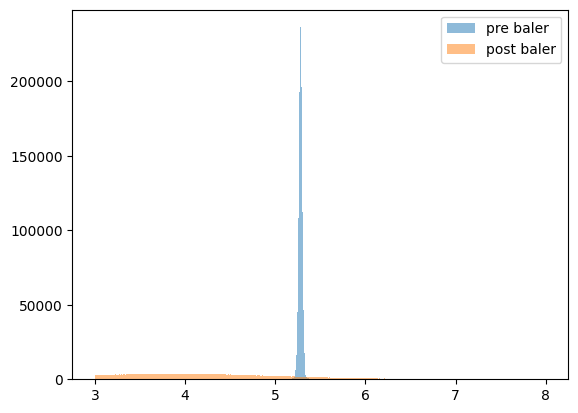

In [25]:
with open(file_root + "data/lhcb/B2KKK_all_withPID.pkl", 'rb') as handle:
    from_pkl = pickle.load(handle)
  
sanity_check = pd.DataFrame(from_pkl) 
create_branches(sanity_check)


sanity_check_B = sanity_check["B_mass"]
data_pre = df_pre["B_mass"]
data_post = df_post["B_mass"]


bins = np.linspace(3, 8, 500)

pyplot.hist(data_pre, bins, alpha=0.5, label='pre baler')
pyplot.hist(data_post, bins, alpha=0.5, label='post baler')
#pyplot.hist(sanity_check_B, bins, alpha=0.5, label='from pkl')

pyplot.legend(loc='upper right')
pyplot.show()
